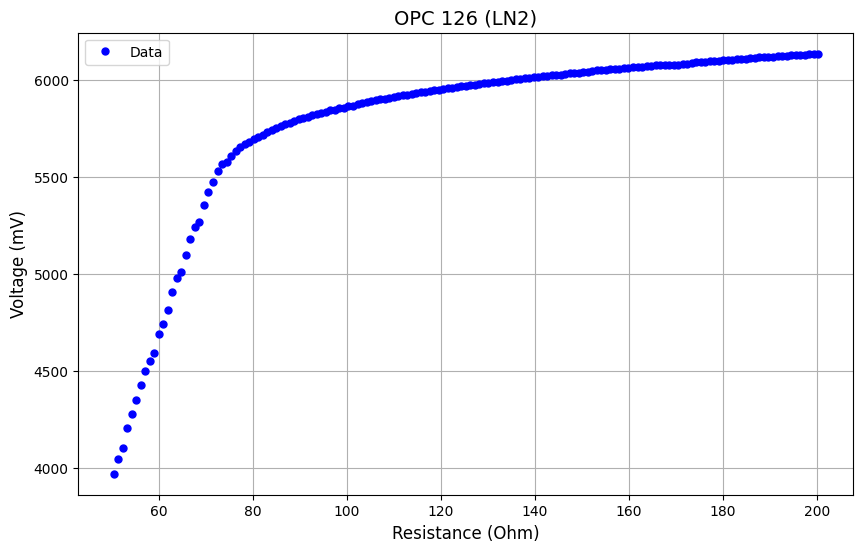

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def fit_and_plot(file_path):
    """
    Reads a two-column data file, fits a line to the first column, 
    and plots the data with the fitted line.
    
    Parameters:
    file_path (str): Path to the .txt file with data.
    """
    # Load the data from the file
    data = np.loadtxt(file_path, delimiter=',')
    #data = np.loadtxt(file_path)
    
    # Extract columns
    x = data[:, 0]  # First column (e.g., time)
    #y = data[:, 3]  # Second column (e.g., value)
    y = data[:, 1]  # Second column (e.g., value)
    #y = abs(y)
    z = (y*y)/x
    # Fit a line to the first column (x)
    coefficients = np.polyfit(x, y, deg=1)  # Linear fit
    m, c = coefficients  # Slope and intercept
    
    # Generate the fitted line
    fitted_line = m * x + c

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'bo', label='Data', markersize=5)  # Original data points
    #plt.plot(x, z, 'bo', label='Data', markersize=5)  # Original data points
 #   plt.plot(x, fitted_line, 'r-', label=f'Fit: y = {m:.2f}x + {c:.2f}')  # Fitted line
    
    # Customize the plot
   # plt.title('Linear Fit to Data', fontsize=14)
    plt.title('OPC 126 (LN2)', fontsize=14)
    #plt.xlabel('Steps', fontsize=12)
    #plt.ylabel('Difference (Multimeter Measurement - Arduino Measurement)', fontsize=12)
    plt.xlabel('Resistance (Ohm)', fontsize=12)
    plt.ylabel('Voltage (mV)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    
    # Show the plot
    plt.show()
    
# Example usage
#file_path = 'file15novv1.txt'  # Replace with the actual file path
#file_path = 'batteryvoltagevsresistance.txt'  # Replace with the actual file path
#file_path = 'filenov19v0.txt' 
file_path = 'filenov19v1withOPC126.txt'
fit_and_plot(file_path)


In [14]:
#file_path = '~/Biswaranjan/Experiment/DUNE/Project/Arduino/2024/coding/filenov19v0.txt'  # Replace with the actual file path
#fit_and_plot(file_path)

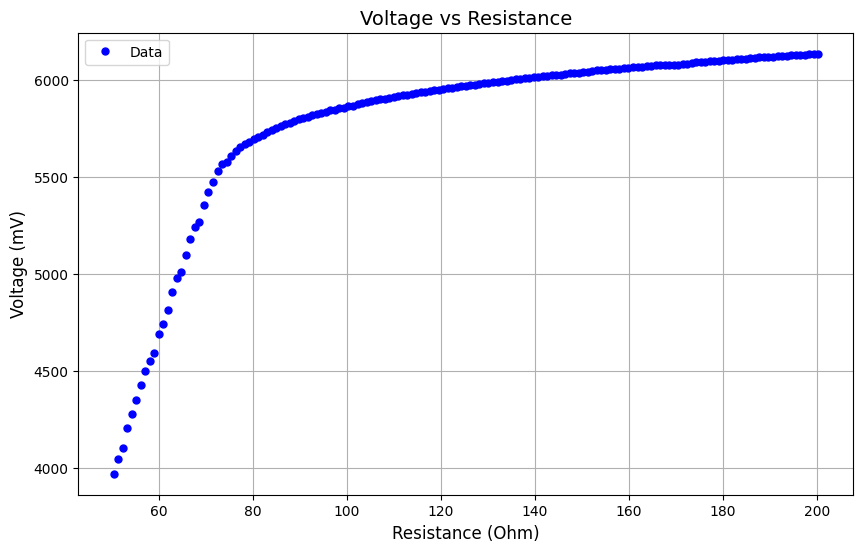

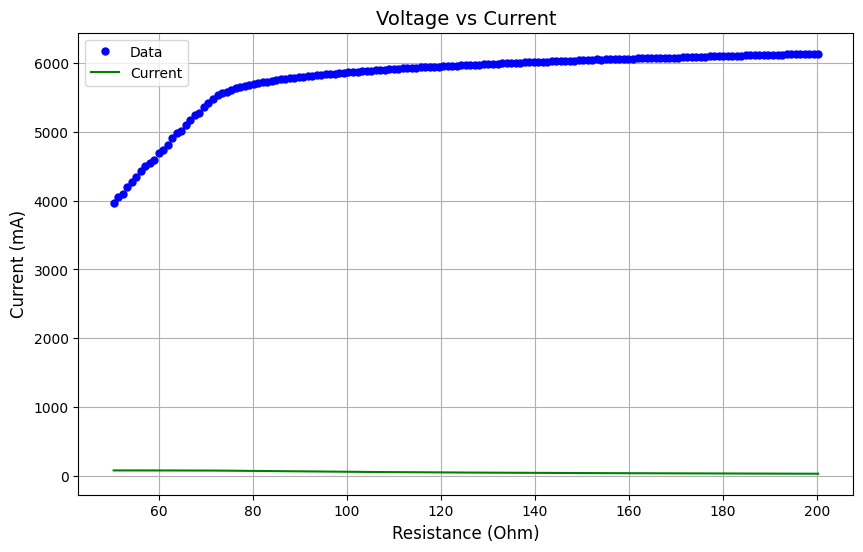

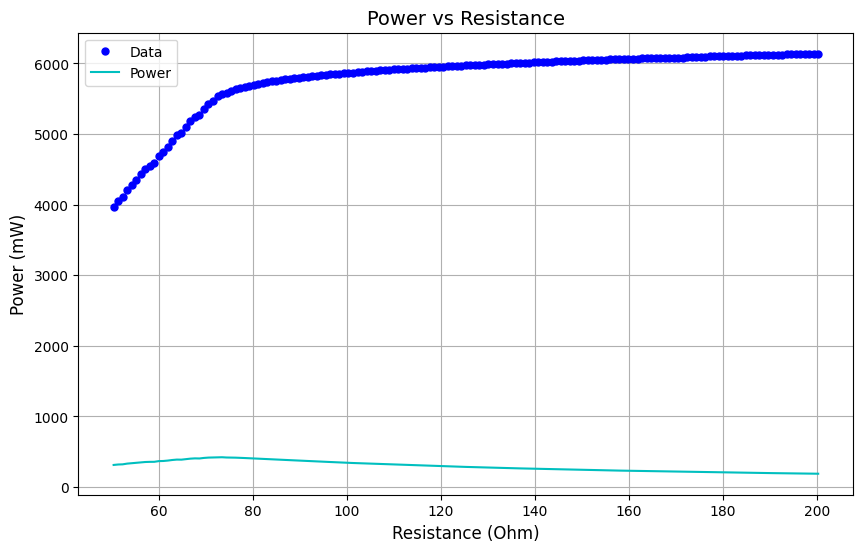

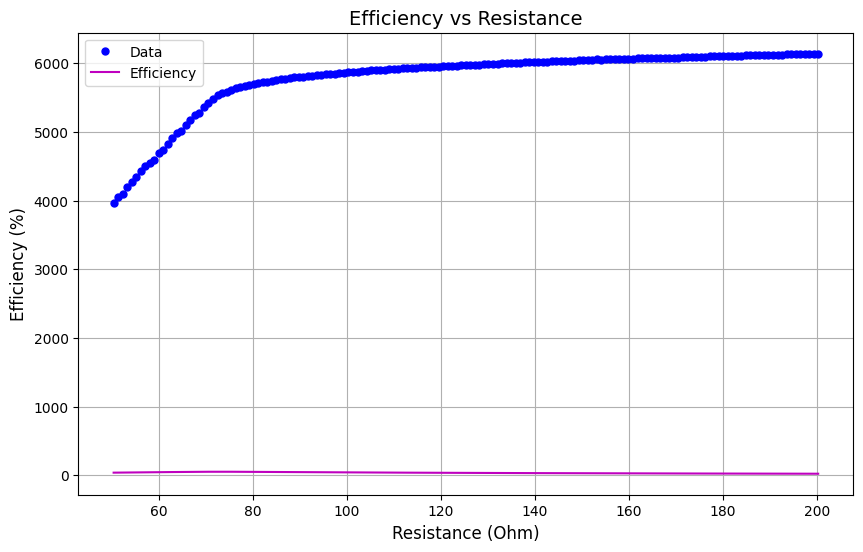

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot(file_path, delimiter=',', fit=False, 
                     x_col=0, y_col=1, 
                     x_label='X-axis', y_label='Y-axis', 
                     plot_title='Plot', axis_names=None):
    """
    Processes and plots data from a file with flexible options.
    
    Parameters:
    - file_path (str): Path to the data file.
    - delimiter (str): Delimiter used in the file (default: ',').
    - fit (bool): Whether to perform linear fitting (default: False).
    - x_col (int): Column index for the X-axis data (default: 0).
    - y_col (int): Column index for the Y-axis data (default: 1).
    - x_label (str): Label for the X-axis (default: 'X-axis').
    - y_label (str): Label for the Y-axis (default: 'Y-axis').
    - plot_title (str): Title of the plot (default: 'Plot').
    - axis_names (list): Additional axis data for multi-plotting.
    """
    # Load the data
    data = np.loadtxt(file_path, delimiter=delimiter)
    x = data[:, x_col]
    y = data[:, y_col]

    plt.figure(figsize=(10, 6))

    # Fit data if requested
    if fit:
        coefficients = np.polyfit(x, y, deg=1)  # Linear fit
        m, c = coefficients
        fitted_line = m * x + c
        plt.plot(x, fitted_line, 'r-', label=f'Fit: y = {m:.2f}x + {c:.2f}')

    plt.plot(x, y, 'bo', label='Data', markersize=5)

    # Additional axis plots if provided
    if axis_names:
        for axis in axis_names:
            plt.plot(x, axis['values'], axis['style'], label=axis['label'])

    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()



def multi_plot(file1, delimiter=','):
    """
    Generates multiple plots from two data files for:
    - Voltage vs Resistance
    - Voltage vs Current
    - Power vs Resistance
    - Efficiency vs Resistance
    
    Parameters:
    - file1, file2 (str): File paths for two data files.
    - delimiter (str): Delimiter used in the file (default: ',').
    """
    for file_path in [file1]:
        data = np.loadtxt(file_path, delimiter=delimiter)
        resistance = data[:, 0]  # Resistance in ohms
        voltage = data[:, 1]  # Voltage in mV
        
        # Calculated quantities
        current = voltage / resistance  # Current in mA (mV / ohm = mA)
        power = (voltage * current) / 1000  # Power in mW (mV * mA = µW, divided by 1000 to convert to mW)
        efficiency = (power / 800) * 100  # Efficiency (%) with input power = 800 mW

        # Voltage vs Resistance
        process_and_plot(
            file_path, delimiter, 
            x_col=0, y_col=1, 
            x_label='Resistance (Ohm)', y_label='Voltage (mV)', 
            plot_title='Voltage vs Resistance'
        )

        # Voltage vs Current
        process_and_plot(
            file_path, delimiter,
            x_col=0, y_col=1, 
            x_label='Resistance (Ohm)', y_label='Current (mA)', 
            plot_title='Voltage vs Current',
            axis_names=[{'values': current, 'style': 'g-', 'label': 'Current'}]
        )

        # Power vs Resistance
        process_and_plot(
            file_path, delimiter,
            x_col=0, y_col=1, 
            x_label='Resistance (Ohm)', y_label='Power (mW)', 
            plot_title='Power vs Resistance',
            axis_names=[{'values': power, 'style': 'c-', 'label': 'Power'}]
        )

        # Efficiency vs Resistance
        process_and_plot(
            file_path, delimiter,
            x_col=0, y_col=1, 
            x_label='Resistance (Ohm)', y_label='Efficiency (%)', 
            plot_title='Efficiency vs Resistance',
            axis_names=[{'values': efficiency, 'style': 'm-', 'label': 'Efficiency'}]
        )


# Example usage
file1 = 'filenov19v1withOPC126.txt'  # Replace with your actual file path
#file2 = 'filenov19v1withOPC126.txt'  # Replace with your actual file path
multi_plot(file1)


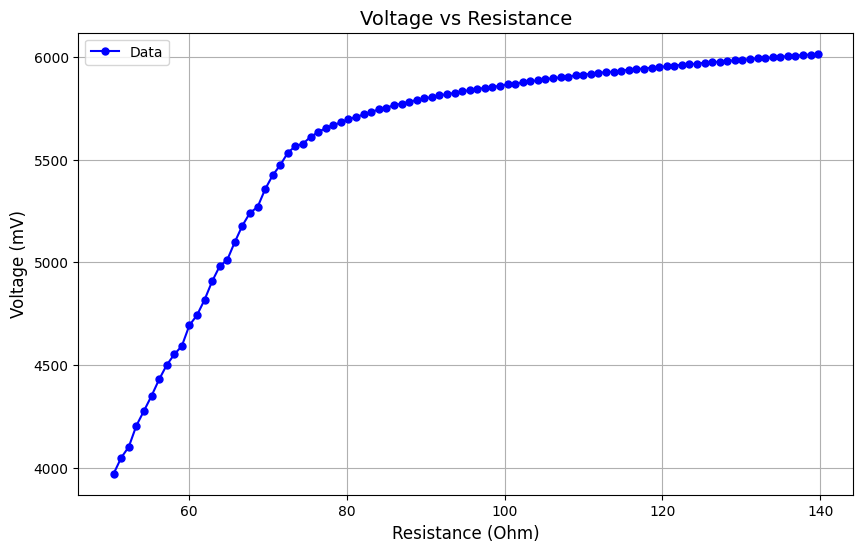

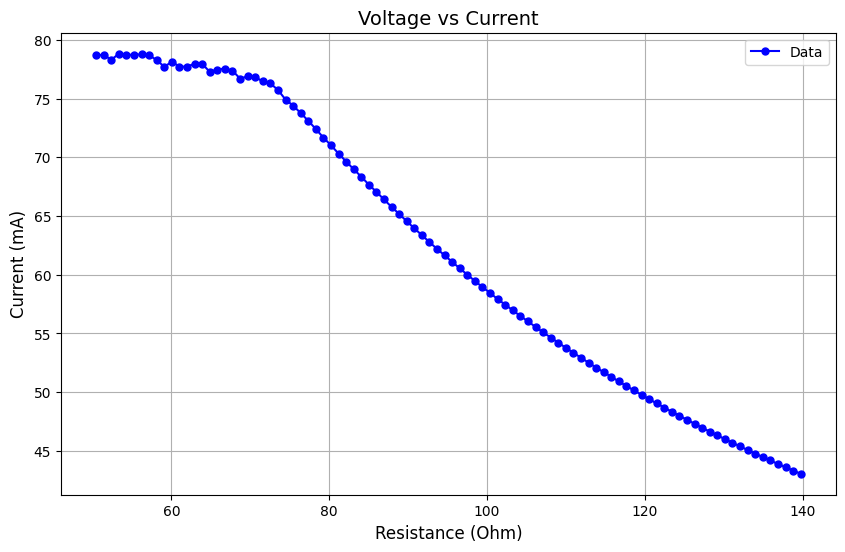

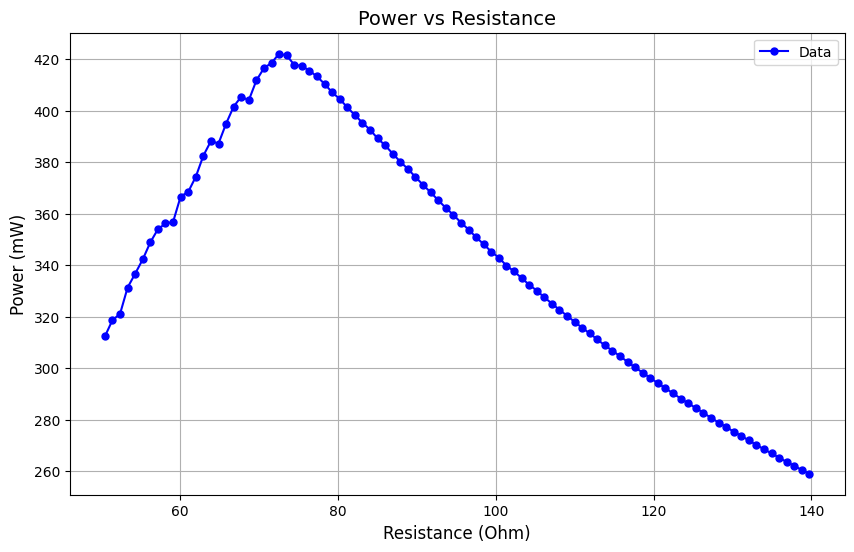

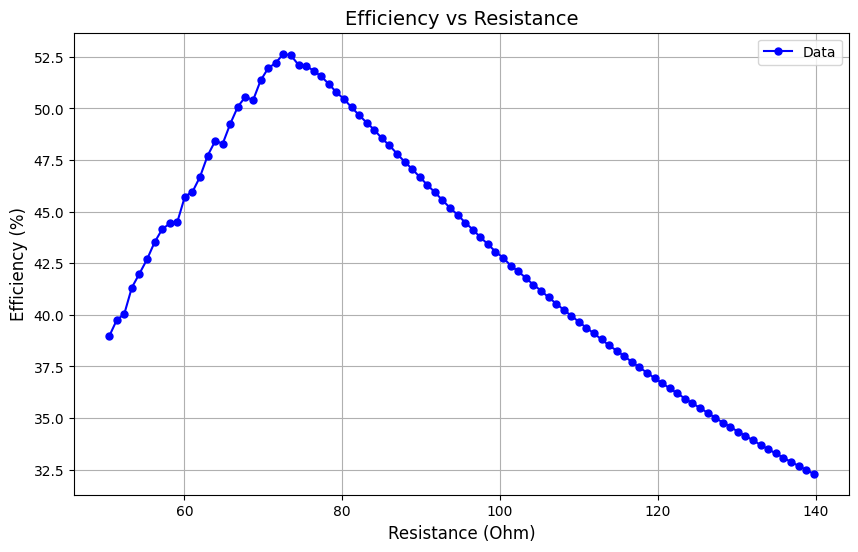

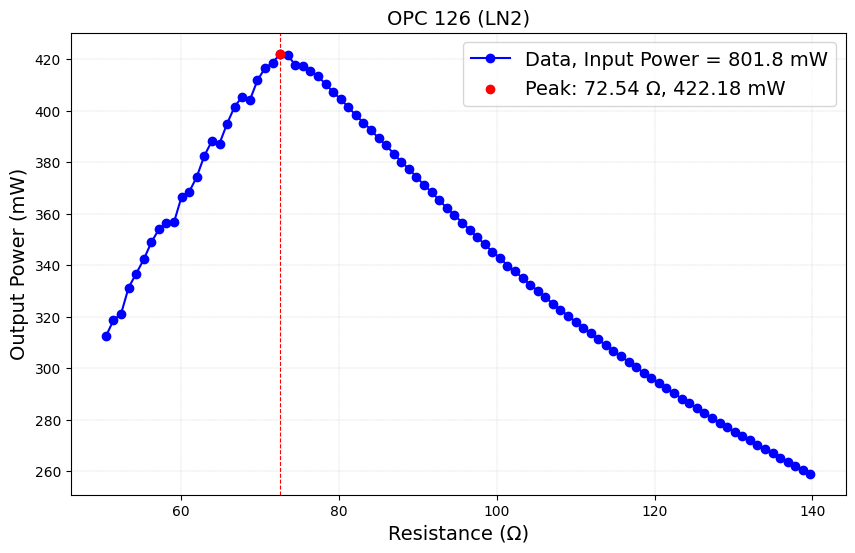

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def process_data(file_path, delimiter=',', max_resistance=140):
    """
    Processes the data from the file.
    
    Parameters:
    - file_path (str): Path to the data file.
    - delimiter (str): Delimiter used in the file (default: ',').
    
    Returns:
    - resistance (np.ndarray): Resistance values in Ohms.
    - voltage (np.ndarray): Voltage values in mV.
    - current (np.ndarray): Current values in mA.
    - power (np.ndarray): Power values in mW.
    - efficiency (np.ndarray): Efficiency values in percentage.
    """
    data = np.loadtxt(file_path, delimiter=delimiter)
    resistance = data[:, 0]  # Resistance in ohms
    voltage = data[:, 1]  # Voltage in mV
    
     # Filter data to stop resistance at the specified maximum
    mask = resistance <= max_resistance
    resistance = resistance[mask]
    voltage = voltage[mask]

    # Calculated quantities
    current = voltage / resistance  # Current in mA (mV / ohm = mA)
    power = (voltage * current) / 1000  # Power in mW (mV * mA = µW, divided by 1000 to convert to mW)
    efficiency = (power / 801.8) * 100  # Efficiency (%) with input power = 800 mW
    
    return resistance, voltage, current, power, efficiency


def plot_data(x, y, x_label, y_label, plot_title, fit=False):
    """
    Plots the data with optional fitting.
    
    Parameters:
    - x (np.ndarray): X-axis data.
    - y (np.ndarray): Y-axis data.
    - x_label (str): Label for the X-axis.
    - y_label (str): Label for the Y-axis.
    - plot_title (str): Title of the plot.
    - fit (bool): Whether to perform linear fitting (default: False).
    """
    plt.figure(figsize=(10, 6))
    
    if fit:
        coefficients = np.polyfit(x, y, deg=1)  # Linear fit
        m, c = coefficients
        fitted_line = m * x + c
        plt.plot(x, fitted_line, 'r-', label=f'Fit: y = {m:.2f}x + {c:.2f}')
    
    plt.plot(x, y, 'bo-', label='Data', markersize=5)
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()


def generate_plots(file_path, delimiter=',', max_resistance=None, fit=False):
    """
    Generates individual plots for:
    - Voltage vs Resistance
    - Voltage vs Current
    - Power vs Resistance
    - Efficiency vs Resistance
    
    Parameters:
    - file_path (str): Path to the data file.
    - delimiter (str): Delimiter used in the file (default: ',').
    - fit (bool): Whether to perform linear fitting (default: False).
    """
    resistance, voltage, current, power, efficiency = process_data(file_path, delimiter,  max_resistance=max_resistance)
    
    # Voltage vs Resistance
    plot_data(
        resistance, voltage,
        x_label='Resistance (Ohm)', y_label='Voltage (mV)',
        plot_title='Voltage vs Resistance', fit=fit
    )
    
    # Voltage vs Current
    plot_data(
        resistance, current,
        x_label='Resistance (Ohm)', y_label='Current (mA)',
        plot_title='Voltage vs Current', fit=fit
    )
   
    # Power vs Resistance
    plot_data(
        resistance, power,
        x_label='Resistance (Ohm)', y_label='Power (mW)',
        plot_title='Power vs Resistance', fit=fit
    )

    
    
    # Efficiency vs Resistance
    plot_data(
        resistance, efficiency,
        x_label='Resistance (Ohm)', y_label='Efficiency (%)',
        plot_title='Efficiency vs Resistance', fit=fit
    )


def generate_plots_from_two_files(file1, file2, delimiter=',', max_resistance=None, fit=False):
    """
    Generates individual plots for two data files.
    
    Parameters:
    - file1, file2 (str): File paths for the data files.
    - delimiter (str): Delimiter used in the file (default: ',').
    - fit (bool): Whether to perform linear fitting (default: False).
    """
    print(f"Processing file: {file1}")
    generate_plots(file1, delimiter=delimiter, max_resistance=None, fit=fit)
    
    print(f"Processing file: {file2}")
    generate_plots(file2, delimiter=delimiter, max_resistance=None, fit=fit)


def plot_single_data(file_path, delimiter=',', max_resistance=None, fit=False):
    """
    Reads data from a file and generates plots for:
    - Voltage vs Resistance
    - Voltage vs Current
    - Power vs Resistance
    - Efficiency vs Resistance
    
    Highlights the peak power on the Power vs Resistance plot.
    
    Parameters:
    - file_path (str): Path to the data file.
    - delimiter (str): Delimiter used in the file (default: ',').
    - max_resistance (float): Maximum resistance value to include (default: None for no limit).
    - fit (bool): Whether to apply a polynomial fit to the curves (default: False).
    """
    # Process the data
    resistance, voltage, current, power, efficiency = process_data(file_path, delimiter=delimiter, max_resistance=max_resistance)

    # Plot Power vs Resistance
    plt.figure(figsize=(10, 6))
    plt.plot(resistance, power, 'bo-', label='Data, Input Power = 801.8 mW')
    
    # Find the peak power and corresponding resistance
    peak_idx = np.argmax(power)
    peak_power = power[peak_idx]
    peak_resistance = resistance[peak_idx]
    
    # Mark the peak on the plot
    plt.scatter(peak_resistance, peak_power, color='red', zorder=5, label=f"Peak: {peak_resistance:.2f} Ω, {peak_power:.2f} mW")
    plt.axvline(x=peak_resistance, color='red', linestyle='--', linewidth=0.8)
    

    # Annotate the peak value
    #plt.annotate(f"({peak_resistance:.2f} Ω, {peak_power:.2f} mW)", 
     #            xy=(peak_resistance, peak_power), 
     #            xytext=(peak_resistance + 10, peak_power - 50), 
      #           arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
       
    # Customize the plot
    plt.title('OPC 126 (LN2)', fontsize=14)
    plt.xlabel('Resistance (Ω)', fontsize=14)
    plt.ylabel('Output Power (mW)', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.2)
    
    # Show the plot
    plt.show()

# Example usage
file1 = 'filenov19v1withOPC126.txt'  # Replace with your actual file path
#file2 = 'data_file2.txt'  # Replace with your actual file path

# For a single file
generate_plots(file1, max_resistance=140, fit=False)

# For two files
#generate_plots_from_two_files(file1, file2, fit=False)
plot_single_data(file_path, delimiter=',', max_resistance=140, fit=False)

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def compare_power_vs_resistance(file1, input_power1, file2, input_power2, 
                                delimiter1=',', delimiter2=None, max_resistance=None, convert_volt_to_millivolt=None):
    """
    Compares two data files by plotting Power vs Resistance for both datasets.
    Highlights the peak power for each dataset on the plot.
    
    Parameters:
    - file1 (str): Path to the first data file.
    - input_power1 (float): Input power (in mW) for the first dataset.
    - file2 (str): Path to the second data file.
    - input_power2 (float): Input power (in mW) for the second dataset.
    - delimiter1 (str): Delimiter used in the first file (default: ',').
    - delimiter2 (str): Delimiter used in the second file (default: None for whitespace).
    - max_resistance (float): Maximum resistance value to include (default: None for no limit).
    """
    
    def process_file(file_path, input_power, delimiter, convert_to_millivolt):
        # Load data based on delimiter
        if delimiter:
            data = np.loadtxt(file_path, delimiter=delimiter)
        else:
            data = np.loadtxt(file_path)
        
        # Extract resistance and voltage
        resistance = data[:, 0]
        voltage = data[:, 1]
        
         # Convert voltage to millivolts if required
        if convert_to_millivolt:
            voltage *= 1000  # Convert volts to millivolts
            
        # Filter data by max resistance if provided
        if max_resistance:
            mask = resistance <= max_resistance
            resistance = resistance[mask]
            voltage = voltage[mask]
        
        # Calculate current, power, and efficiency
        current = voltage / resistance
        output_power = (voltage * current)/ 1000  # Output power in mW
        efficiency = (output_power / input_power) * 100  # Efficiency in %
        
        return resistance, output_power, efficiency
    
    # Determine voltage conversion requirements
    convert1 = convert_volt_to_millivolt and '1' in convert_volt_to_millivolt
    convert2 = convert_volt_to_millivolt and '2' in convert_volt_to_millivolt
    
    # Process both files
    res1, power1, eff1 = process_file(file1, input_power1, delimiter1, convert1)
    res2, power2, eff2 = process_file(file2, input_power2, delimiter2, convert2)
    
    # Plot Power vs Resistance for both files
    plt.figure(figsize=(10, 6))
    plt.plot(res1, power1, 'bo-', label=f"Automate Process: Input Power = {input_power1} mW", color='blue')
    plt.plot(res2, power2, 'bo-', label=f"Mannual Process: Input Power = {input_power2} mW", color='orange')
    
    # Highlight peaks
    peak_idx1 = np.argmax(power1)
    peak_res1, peak_pow1 = res1[peak_idx1], power1[peak_idx1]
    plt.scatter(peak_res1, peak_pow1, color='red', zorder=5, label=f"Resitance: {peak_res1:.2f} Ω, Power: {peak_pow1:.2f} mW")
    plt.axvline(x=peak_res1, color='red', linestyle='--', linewidth=0.8)
    """ plt.annotate(f"({peak_res1:.2f} Ω, {peak_pow1:.2f} mW)", 
                 xy=(peak_res1, peak_pow1), 
                 xytext=(peak_res1 + 10, peak_pow1 - 50), 
                 arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10) """
    
    peak_idx2 = np.argmax(power2)
    peak_res2, peak_pow2 = res2[peak_idx2], power2[peak_idx2]
    plt.scatter(peak_res2, peak_pow2, color='black', zorder=5, label=f"Resitance: {peak_res2:.2f} Ω, Power: {peak_pow2:.2f} mW")
    plt.axvline(x=peak_res2, color='black', linestyle='--', linewidth=0.8)
    """ plt.annotate(f"({peak_res2:.2f} Ω, {peak_pow2:.2f} mW)", 
                 xy=(peak_res2, peak_pow2), 
                 xytext=(peak_res2 + 10, peak_pow2 - 50), 
                 arrowprops=dict(facecolor='orange', arrowstyle='->'), fontsize=10) """
    
    # Customize the plot
    plt.title('OPC 126 (LN2)', fontsize=14)
    plt.xlabel('Resistance (Ω)', fontsize=12)
    plt.ylabel('Output Power (mW)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.2)
    
    # Show the plot
    plt.show()


/var/folders/ky/f3pw42_14ls5tgnplg1yrykmbsrfvh/T/ipykernel_12274/3752369839.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(res1, power1, 'bo-', label=f"Automate Process: Input Power = {input_power1} mW", color='blue')
/var/folders/ky/f3pw42_14ls5tgnplg1yrykmbsrfvh/T/ipykernel_12274/3752369839.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(res2, power2, 'bo-', label=f"Mannual Process: Input Power = {input_power2} mW", color='orange')


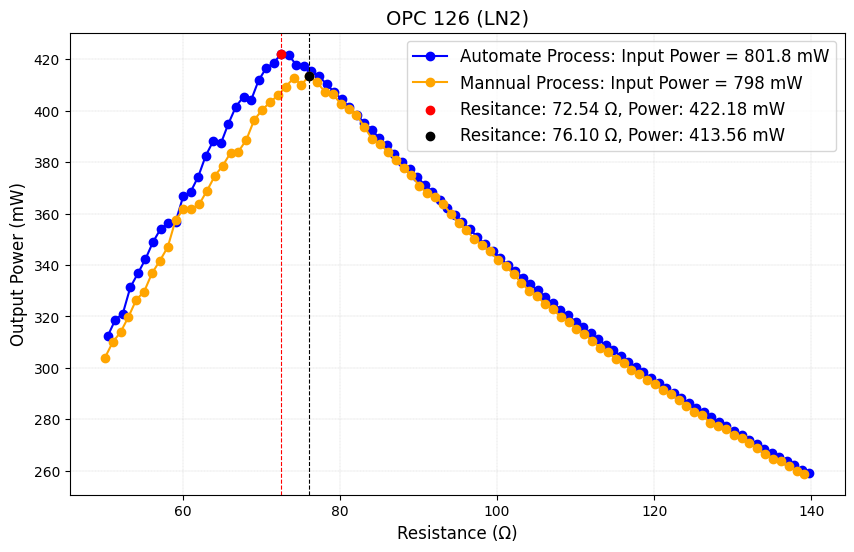

In [55]:
# File 1: Delimited by commas, input power = 801.8 mW
file1 = 'filenov19v1withOPC126.txt'
input_power1 = 801.8

# File 2: No delimiter, input power =  mW
file2 = 'opc126_800mW_25jan_2023.txt'
input_power2 = 798

# Compare Power vs Resistance for both files
compare_power_vs_resistance(file1, input_power1, file2, input_power2, 
                            delimiter1=',', delimiter2=None, max_resistance=140, convert_volt_to_millivolt=['2'])


/var/folders/ky/f3pw42_14ls5tgnplg1yrykmbsrfvh/T/ipykernel_12789/93465973.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')


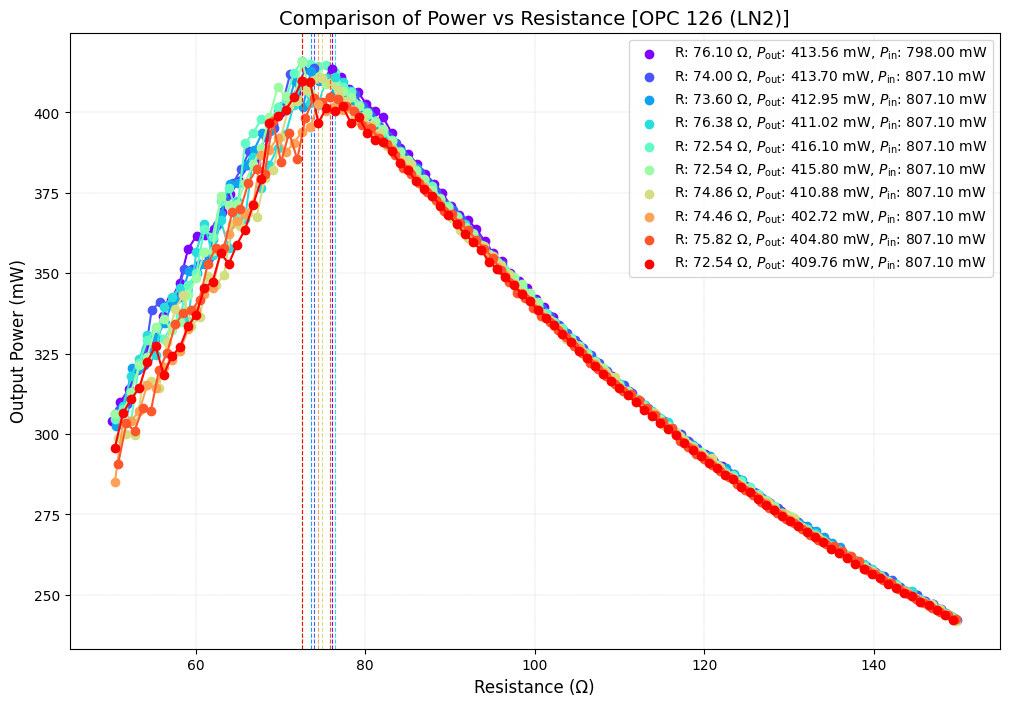

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def compare_power_vs_resistance(files, input_powers, delimiters=None, max_resistance=None, convert_volt_to_millivolt=None):
    """
    Compares up to 10 data files by plotting Power vs Resistance for each dataset.
    Highlights the peak power for each dataset on the plot using a rainbow spectrum.

    Parameters:
    - files (list of str): List of paths to data files.
    - input_powers (list of float): List of input power values (in mW) for each dataset.
    - delimiters (list of str): List of delimiters for each file (default: None for whitespace).
    - max_resistance (float): Maximum resistance value to include (default: None for no limit).
    - convert_volt_to_millivolt (list of bool): List of flags indicating if voltage should be converted to millivolts for each file.
    """

    def process_file(file_path, input_power, delimiter, convert_to_millivolt):
        # Load data based on the provided delimiter
        if delimiter:
            data = np.loadtxt(file_path, delimiter=delimiter)
        else:
            data = np.loadtxt(file_path)

        # Extract resistance and voltage
        resistance = data[:, 0]
        voltage = data[:, 1]

        # Convert voltage to millivolts if required
        if convert_to_millivolt:
            voltage *= 1000  # Convert volts to millivolts

        # Filter data by max resistance if provided
        if max_resistance:
            mask = resistance <= max_resistance
            resistance = resistance[mask]
            voltage = voltage[mask]

        # Calculate current, power, and efficiency
        current = voltage / resistance
        output_power = (voltage * current) / 1000  # Output power in mW
        efficiency = (output_power / input_power) * 100  # Efficiency in %

        return resistance, output_power, efficiency

    # Initialize lists to store results
    all_resistances = []
    all_powers = []
    labels = []

    # Create a rainbow colormap
    cmap = get_cmap('rainbow')
    colors = [cmap(i / (len(files) - 1)) for i in range(len(files))]

    # Iterate over files and process each one
    for i, file in enumerate(files):
        delimiter = delimiters[i] if delimiters else None
        convert = convert_volt_to_millivolt[i] if convert_volt_to_millivolt else False
        resistance, power, _ = process_file(file, input_powers[i], delimiter, convert)
        all_resistances.append(resistance)
        all_powers.append(power)

        # Manual label for the first dataset
        #if i == 0:
        #     labels.append(f"Old data collection: Input Power = {input_powers[i]} mW")
        # else:
        #     labels.append(f"Dataset {i}: Input Power = {input_powers[i]} mW")


    # Plot Power vs Resistance for all datasets
    plt.figure(figsize=(12, 8))
    for i, (resistance, power) in enumerate(zip(all_resistances, all_powers)):
        #plt.plot(resistance, power, 'o-', color=colors[i], label=labels[i])
        plt.plot(resistance, power, 'o-', color=colors[i])

        # Highlight peaks
        peak_idx = np.argmax(power)
        peak_res, peak_pow = resistance[peak_idx], power[peak_idx]
        plt.scatter(peak_res,peak_pow,color=colors[i],zorder=5,label=(
        f"R: {peak_res:.2f} Ω, "
        + r"$P_{\text{out}}$"  # Add LaTeX part
        + f": {peak_pow:.2f} mW," + r" $P_{\text{in}}$"  # Add LaTeX part
        + f": {input_powers[i]:.2f} mW"))
        plt.axvline(x=peak_res, color=colors[i], linestyle='--', linewidth=0.8)
        # plt.annotate(f"({peak_res:.2f} Ω, {peak_pow:.2f} mW)",
        #              xy=(peak_res, peak_pow),
        #              xytext=(peak_res + 10, peak_pow - 50),
        #              arrowprops=dict(facecolor=colors[i], arrowstyle='->'),
        #              fontsize=10)

    # Customize the plot
    plt.title('Comparison of Power vs Resistance [OPC 126 (LN2)]', fontsize=14)
    plt.xlabel('Resistance (Ω)', fontsize=12)
    plt.ylabel('Output Power (mW)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.2)

    # Show the plot
    plt.show()
#filenov19v1withOPC126.txt
#801.8
#','
# Example Usage
files = [
    "opc126_800mW_25jan_2023.txt", "LN2_2dec_2.txt", "LN2_2dec_3.txt", "LN2_2dec_4.txt", "LN2_2dec_5.txt",
    "LN2_2dec_6.txt", "LN2_2dec_7.txt", "LN2_2dec_8.txt", "LN2_2dec_9.txt", "LN2_2dec_10.txt"
]
input_powers = [798, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1]
delimiters = [ None, ',', None, None,   None, None, None, None, None, None]
convert_volt_to_millivolt = [True, False, False, False,  False, False, False, False, False,False]

compare_power_vs_resistance(files, input_powers, delimiters, max_resistance=150, convert_volt_to_millivolt=convert_volt_to_millivolt)



/var/folders/ky/f3pw42_14ls5tgnplg1yrykmbsrfvh/T/ipykernel_12789/3131486153.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')


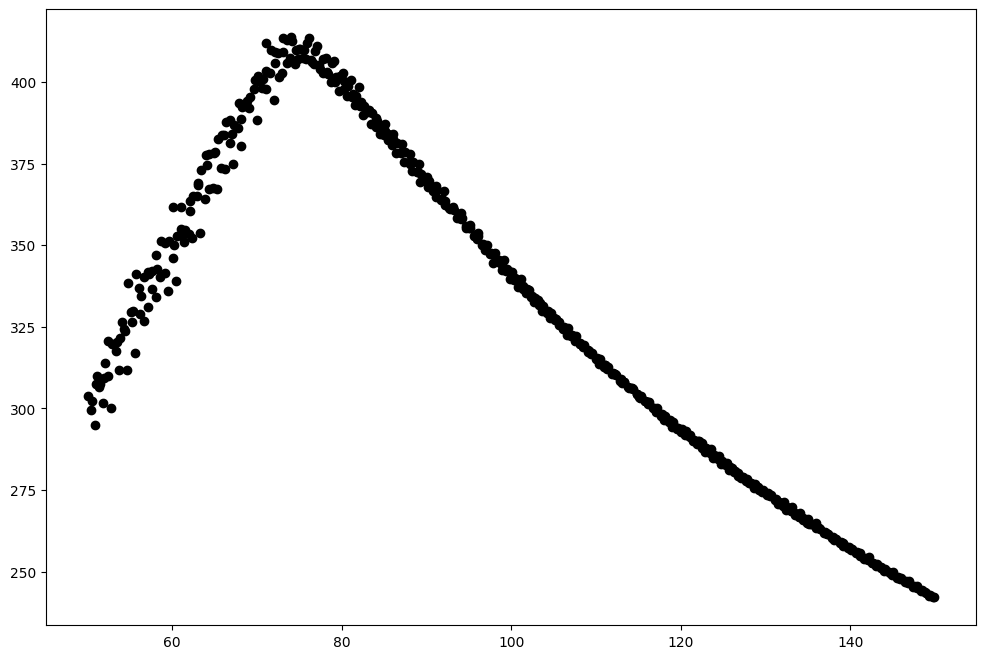

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def compare_power_vs_resistance(files, input_powers, delimiters=None, max_resistance=None, convert_volt_to_millivolt=None):
    """
    Compares up to 10 data files by plotting Power vs Resistance for each dataset.
    Highlights the peak power for each dataset on the plot using a rainbow spectrum.
    Additionally, plots the average Power vs Resistance across all datasets.
    """
    def process_file(file_path, input_power, delimiter, convert_to_millivolt):
        # Load data based on the provided delimiter
        if delimiter:
            data = np.loadtxt(file_path, delimiter=delimiter)
        else:
            data = np.loadtxt(file_path)

        # Extract resistance and voltage
        resistance = data[:, 0]
        voltage = data[:, 1]

        # Convert voltage to millivolts if required
        if convert_to_millivolt:
            voltage *= 1000  # Convert volts to millivolts

        # Filter data by max resistance if provided
        if max_resistance:
            mask = resistance <= max_resistance
            resistance = resistance[mask]
            voltage = voltage[mask]

        # Calculate current, power, and efficiency
        current = voltage / resistance
        output_power = (voltage * current) / 1000  # Output power in mW
        efficiency = (output_power / input_power) * 100  # Efficiency in %

        return resistance, output_power, efficiency

    # Initialize lists to store results
    all_resistances = []
    all_powers = []
    labels = []

    # Create a rainbow colormap
    cmap = get_cmap('rainbow')
    colors = [cmap(i / (len(files) - 1)) for i in range(len(files))]

    # Iterate over files and process each one
    for i, file in enumerate(files):
        delimiter = delimiters[i] if delimiters else None
        convert = convert_volt_to_millivolt[i] if convert_volt_to_millivolt else False
        resistance, power, _ = process_file(file, input_powers[i], delimiter, convert)
        all_resistances.append(resistance)
        all_powers.append(power)
        labels.append(f"Dataset {i+1}: Input Power = {input_powers[i]} mW")

    # Combine all data for averaging
    all_combined_data = []
    for resistance, power in zip(all_resistances, all_powers):
        all_combined_data.append(np.column_stack((resistance, power)))

    # Concatenate all datasets
    combined_data = np.vstack(all_combined_data)

    # Get unique resistance values and calculate average power
    unique_resistances = np.unique(combined_data[:, 0])
    average_powers = [
        combined_data[combined_data[:, 0] == res, 1].mean() for res in unique_resistances
    ]

    # Plot Power vs Resistance for all datasets
    plt.figure(figsize=(12, 8))
    # for i, (resistance, power) in enumerate(zip(all_resistances, all_powers)):
    #     plt.plot(resistance, power, 'o-', color=colors[i], label=labels[i])

    #     # Highlight peaks
    #     peak_idx = np.argmax(power)
    #     peak_res, peak_pow = resistance[peak_idx], power[peak_idx]
    #     plt.scatter(peak_res, peak_pow, color=colors[i], zorder=5)
    #     plt.axvline(x=peak_res, color=colors[i], linestyle='--', linewidth=0.8)

    # Plot the average Power vs Resistance
    plt.plot(unique_resistances, average_powers, 'o', color='black', linewidth=1, label="Average")

    # # Customize the plot
    # plt.title('Comparison of Power vs Resistance with Average (Rainbow Spectrum)', fontsize=14)
    # plt.xlabel('Resistance (Ω)', fontsize=12)
    # plt.ylabel(r'$P_{\text{out}}$ (mW)', fontsize=12)
    # plt.legend(fontsize=10)
    # plt.grid(True, linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()

# Example Usage
files = [
    "opc126_800mW_25jan_2023.txt", "LN2_2dec_2.txt", "LN2_2dec_3.txt", "LN2_2dec_4.txt", "LN2_2dec_5.txt",
    "LN2_2dec_6.txt", "LN2_2dec_7.txt", "LN2_2dec_8.txt", "LN2_2dec_9.txt", "LN2_2dec_10.txt"
]
input_powers = [798, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1]
delimiters = [ None, ',', None, None,   None, None, None, None, None, None]
convert_volt_to_millivolt = [True, False, False, False,  False, False, False, False, False,False]


compare_power_vs_resistance(files, input_powers, delimiters, max_resistance=150, convert_volt_to_millivolt=convert_volt_to_millivolt)


Peak Resistance: 75.68 Ω
Peak Average Power: 407.82 mW


/var/folders/ky/f3pw42_14ls5tgnplg1yrykmbsrfvh/T/ipykernel_12789/2450071758.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')


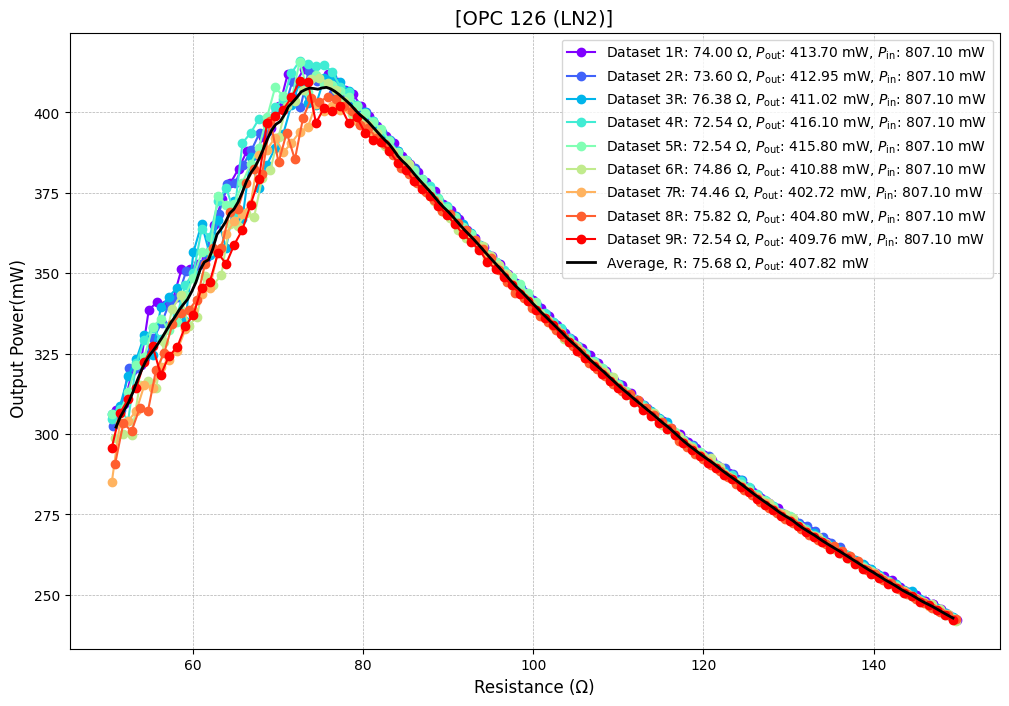

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def compare_power_vs_resistance(files, input_powers, delimiters=None, max_resistance=None, convert_volt_to_millivolt=None):
    """
    Compares data files by plotting Power vs Resistance for each dataset.
    Additionally, calculates the row-wise average resistance and power across all datasets and plots it.
    """

    def process_file(file_path, input_power, delimiter, convert_to_millivolt):
        # Load data based on the provided delimiter
        if delimiter:
            data = np.loadtxt(file_path, delimiter=delimiter)
        else:
            data = np.loadtxt(file_path)

        # Extract resistance and voltage
        resistance = data[:, 0]
        voltage = data[:, 1]

        # Convert voltage to millivolts if required
        if convert_to_millivolt:
            voltage *= 1000  # Convert volts to millivolts

        # Filter data by max resistance if provided
        if max_resistance:
            mask = resistance <= max_resistance
            resistance = resistance[mask]
            voltage = voltage[mask]

        # Calculate current and power
        current = voltage / resistance
        output_power = (voltage * current) / 1000  # Output power in mW
        return resistance, output_power

    # Initialize lists to store results
    all_resistances = []
    all_powers = []

    # Create a rainbow colormap
    cmap = get_cmap('rainbow')
    colors = [cmap(i / (len(files) - 1)) for i in range(len(files))]

    # Process each file
    for i, file in enumerate(files):
        delimiter = delimiters[i] if delimiters else None
        convert = convert_volt_to_millivolt[i] if convert_volt_to_millivolt else False
        resistance, power = process_file(file, input_powers[i], delimiter, convert)
        all_resistances.append(resistance)
        all_powers.append(power)

    # Determine a common resistance range for interpolation
    min_resistance = max(res[0] for res in all_resistances)
    max_resistance = min(res[-1] for res in all_resistances)
    common_resistance = np.linspace(min_resistance, max_resistance, 200)  # Common resistance grid

    # Interpolate all datasets to the common resistance grid
    interpolated_powers = []
    for resistance, power in zip(all_resistances, all_powers):
        interp_power = np.interp(common_resistance, resistance, power)
        interpolated_powers.append(interp_power)

    # Calculate the row-wise average power
    avg_power = np.mean(interpolated_powers, axis=0)

    # Plot Power vs Resistance for all datasets
    plt.figure(figsize=(12, 8))
    for i, (resistance, power) in enumerate(zip(all_resistances, all_powers)):
        peak_idx = np.argmax(power)
        peak_res, peak_pow = resistance[peak_idx], power[peak_idx]
       
        plt.plot(resistance, power, 'o-', color=colors[i], label=(f"Dataset {i+1}"+f"R: {peak_res:.2f} Ω, "
        + r"$P_{\text{out}}$"  # Add LaTeX part
        + f": {peak_pow:.2f} mW," + r" $P_{\text{in}}$"  # Add LaTeX part
        + f": {input_powers[i]:.2f} mW"))
        # plt.scatter(peak_res,peak_pow,color=colors[i],zorder=5,label=(
        # f"R: {peak_res:.2f} Ω, "
        # + r"$P_{\text{out}}$"  # Add LaTeX part
        # + f": {peak_pow:.2f} mW," + r" $P_{\text{in}}$"  # Add LaTeX part
        # + f": {input_powers[i]:.2f} mW"))

    # Plot the average Power vs Resistance
   # Find the index of the peak average power
    peak_index = np.argmax(avg_power)

    # Get the corresponding resistance and power values
    peak_resistance = common_resistance[peak_index]
    peak_avg_power = avg_power[peak_index]

    print(f"Peak Resistance: {peak_resistance:.2f} Ω")
    print(f"Peak Average Power: {peak_avg_power:.2f} mW")

    # Add the peak annotation to the plot
    plt.plot(common_resistance, avg_power, 'k-', linewidth=2, label=(f"Average, " + f"R: {peak_resistance:.2f} Ω, " + r"$P_{\text{out}}$" + f": {peak_avg_power:.2f} mW"))
    # plt.scatter(peak_resistance, peak_avg_power, color='red', zorder=5)
    # plt.axvline(x=peak_resistance, color='red', linestyle='--', linewidth=0.8)

    # peak_avg_power = np.max(avg_power)  # Find the peak of the average power
    # plt.plot(common_resistance, avg_power, 'k-', linewidth=2, label=(f"Average, " + r"$P_{\text{out}}$" + f": {peak_avg_power:.2f} mW"))

    # Customize the plot
    plt.title('[OPC 126 (LN2)]', fontsize=14)
    plt.xlabel('Resistance (Ω)', fontsize=12)
    plt.ylabel(' Output Power(mW)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()

# Example Usage
files = [
    "LN2_2dec_2.txt", "LN2_2dec_3.txt", "LN2_2dec_4.txt", "LN2_2dec_5.txt",
    "LN2_2dec_6.txt", "LN2_2dec_7.txt", "LN2_2dec_8.txt", "LN2_2dec_9.txt", "LN2_2dec_10.txt"
]
input_powers = [ 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1, 807.1]
delimiters = [  ',', None, None,   None, None, None, None, None, None]
convert_volt_to_millivolt = [ False, False, False,  False, False, False, False, False,False]

compare_power_vs_resistance(files, input_powers, delimiters, max_resistance=150, convert_volt_to_millivolt=convert_volt_to_millivolt)



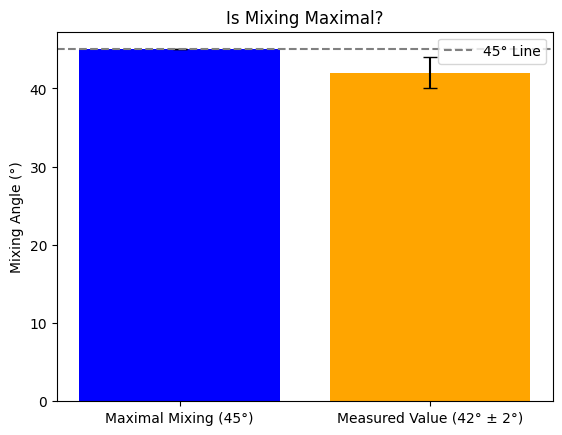

In [1]:
import matplotlib.pyplot as plt

# Data
angles = [45, 42]  # Maximal mixing and measured value (example)
labels = ["Maximal Mixing (45°)", "Measured Value (42° ± 2°)"]
colors = ["blue", "orange"]
errors = [0, 2]  # Uncertainty for measured value

# Plot
plt.bar(labels, angles, color=colors, yerr=errors, capsize=5)
plt.axhline(45, color='gray', linestyle='--', label="45° Line")
plt.title("Is Mixing Maximal?")
plt.ylabel("Mixing Angle (°)")
plt.legend()
plt.show()


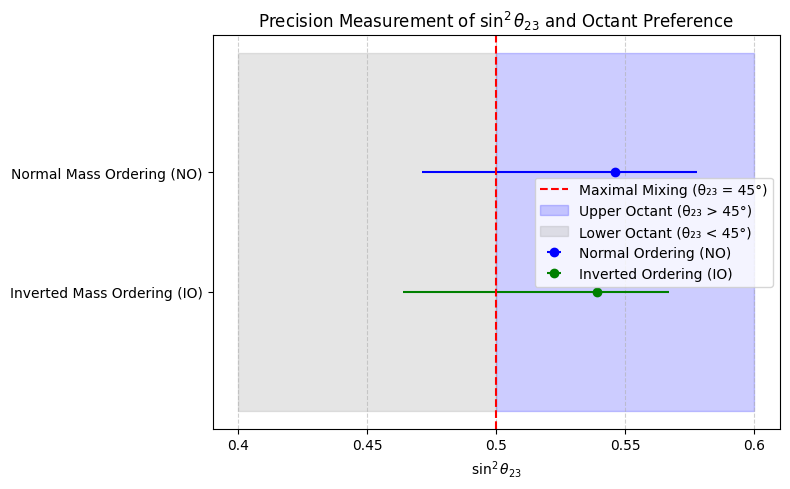

In [15]:
import matplotlib.pyplot as plt

# Data
sin2_theta23_NO = 0.546
error_NO = [[0.075], [0.032]]
sin2_theta23_IO = 0.539
error_IO = [[0.075], [0.028]]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(sin2_theta23_NO, 1, xerr=error_NO, fmt='o', label='Normal Ordering (NO)', color='blue')
plt.errorbar(sin2_theta23_IO, 0, xerr=error_IO, fmt='o', label='Inverted Ordering (IO)', color='green')

# Reference lines and regions
plt.axvline(0.5, color='red', linestyle='--', label='Maximal Mixing (\u03B8\u2082\u2083 = 45°)')
plt.fill_betweenx([-1, 2], 0.5, 0.6, color='blue', alpha=0.2, label='Upper Octant (\u03B8\u2082\u2083 > 45°)')
plt.fill_betweenx([-1, 2], 0.4, 0.5, color='gray', alpha=0.2, label='Lower Octant (\u03B8\u2082\u2083 < 45°)')

# Labels and legends
plt.yticks([0, 1], ['Inverted Mass Ordering (IO)', 'Normal Mass Ordering (NO)'])
plt.xticks([0.4, 0.45, 0.5, 0.55, 0.6], ['0.4', '0.45', '0.5', '0.55', '0.6'])
plt.xlabel(r'$\sin^2\theta_{23}$')
plt.title(r'Precision Measurement of $\sin^2\theta_{23}$ and Octant Preference')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


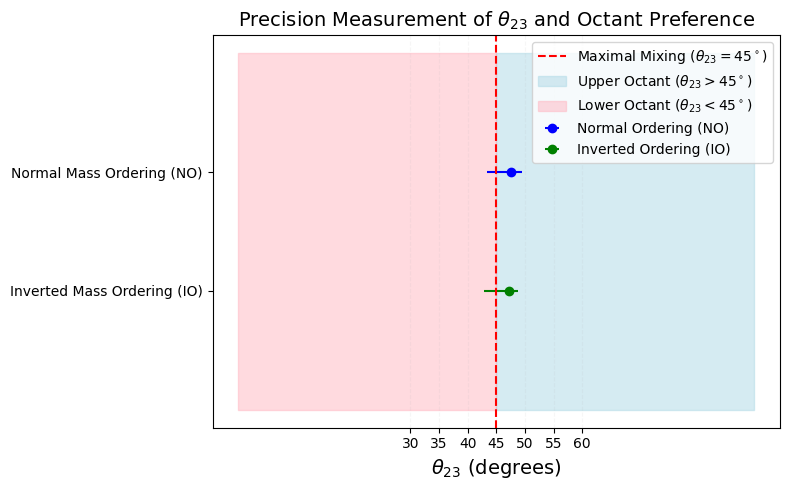

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert sin^2(theta) to theta (in degrees)
def sin2_to_theta(sin2_theta):
    return np.degrees(np.arcsin(np.sqrt(sin2_theta)))

# Data (sin^2(theta23) for NO and IO)
sin2_theta23_NO = 0.546
error_NO = [0.075, 0.032]  # Lower and upper errors
sin2_theta23_IO = 0.539
error_IO = [0.075, 0.028]  # Lower and upper errors

# Convert sin^2(theta23) to theta23 in degrees
theta23_NO = sin2_to_theta(sin2_theta23_NO)
theta23_IO = sin2_to_theta(sin2_theta23_IO)

# Convert errors for theta23 in degrees
error_theta23_NO = [
    theta23_NO - sin2_to_theta(sin2_theta23_NO - error_NO[0]),  # Lower error
    sin2_to_theta(sin2_theta23_NO + error_NO[1]) - theta23_NO   # Upper error
]
error_theta23_IO = [
    theta23_IO - sin2_to_theta(sin2_theta23_IO - error_IO[0]),  # Lower error
    sin2_to_theta(sin2_theta23_IO + error_IO[1]) - theta23_IO   # Upper error
]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(
    [theta23_NO], [1], xerr=[[error_theta23_NO[0]], [error_theta23_NO[1]]],
    fmt='o', label='Normal Ordering (NO)', color='blue'
)
plt.errorbar(
    [theta23_IO], [0], xerr=[[error_theta23_IO[0]], [error_theta23_IO[1]]],
    fmt='o', label='Inverted Ordering (IO)', color='green'
)

# Reference lines and regions
plt.axvline(45, color='red', linestyle='--', label='Maximal Mixing ($\\theta_{23} = 45^\\circ$)')
plt.fill_betweenx([-1, 2], 45, 90, color='lightblue', alpha=0.5, label='Upper Octant ($\\theta_{23} > 45^\\circ$)')
plt.fill_betweenx([-1, 2], 0, 45, color='lightpink', alpha=0.5, label='Lower Octant ($\\theta_{23} < 45^\\circ$)')

# Labels and legends
plt.yticks([0, 1], ['Inverted Mass Ordering (IO)', 'Normal Mass Ordering (NO)'])
plt.xticks([30, 35, 40, 45, 50, 55, 60], ['30', '35', '40', '45', '50', '55', '60'])
plt.xlabel(r'$\theta_{23}$ (degrees)', fontsize=14)
plt.title(r'Precision Measurement of $\theta_{23}$ and Octant Preference', fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.1)
plt.tight_layout()

plt.show()


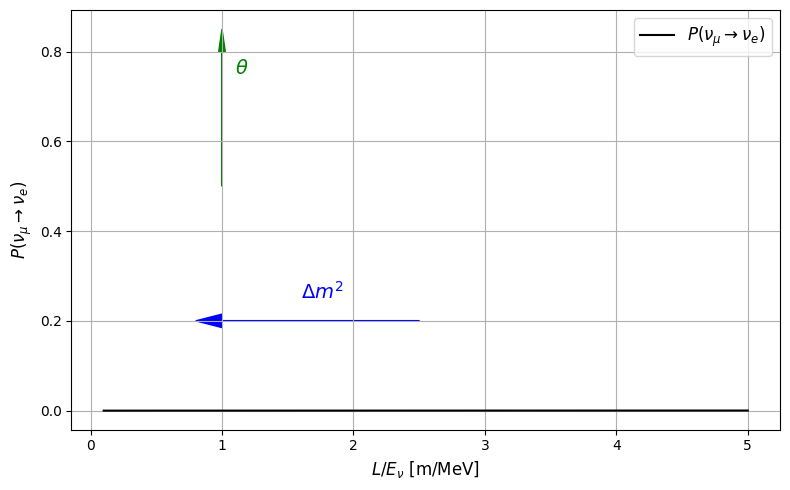

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for neutrino oscillations
theta = np.radians(45)  # Mixing angle (in radians)
Delta_m2 = 2.4e-3       # Mass-squared difference in eV^2
L_over_E = np.linspace(0.1, 5, 1000)  # Range of L/E in m/MeV (avoid division by zero)

# Oscillation probability function
P_mu_to_e = np.sin(2 * theta)**2 * np.sin(1.27 * Delta_m2 * L_over_E)**2

# Plot the oscillation probability
plt.figure(figsize=(8, 5))
plt.plot(L_over_E, P_mu_to_e, label=r"$P(\nu_\mu \to \nu_e)$", color='black')

# Add arrows for visualization
# Green arrow for θ
plt.arrow(1, 0.5, 0, 0.3, head_width=0.05, head_length=0.05, fc='green', ec='green')
plt.text(1.1, 0.75, r"$\theta$", fontsize=14, color='green')

# Blue arrow for Δm²
plt.arrow(2.5, 0.2, -1.5, 0, head_width=0.03, head_length=0.2, fc='blue', ec='blue')
plt.text(1.6, 0.25, r"$\Delta m^2$", fontsize=14, color='blue')

# Labels and legend
plt.xlabel(r"$L/E_\nu$ [m/MeV]", fontsize=12)
plt.ylabel(r"$P(\nu_\mu \to \nu_e)$", fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid()
plt.tight_layout()

# Show plot
plt.show()
